In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, model_selection
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import preprocessing

In [8]:
data = pd.read_csv("data/test.csv")

In [9]:
data = data.drop(["Condition1", "Condition2",
                 "MiscVal", "MiscFeature", "GarageYrBlt",
                 "GarageCars", "GarageFinish", "GarageType",
                 "Fireplaces", "FireplaceQu", "PavedDrive", "MasVnrArea",
                  "MasVnrType", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
                  "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch",
                  "ScreenPorch", "BsmtFinType1", "BsmtFinType2",
                  "BsmtFinSF1", "BsmtFinSF2", "Id", "PoolQC", "Fence", "Alley", "PoolArea",
                  "Exterior1st", "Exterior2nd", "BsmtExposure", "MoSold", "YrSold", "YearBuilt"
                  ], axis=1)

In [10]:
data['bathrooms'] = data[["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath"]].sum(axis=1)
data = data.drop(["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath"], axis=1)


In [11]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,bathrooms
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1458.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1983.662783,554.294925,1046.117970,1486.045922,2.854010,1.042495,6.385195,472.768861,2.447567
std,42.746880,22.376841,4955.517327,1.436812,1.113740,21.130467,437.260486,442.898624,485.566099,0.829788,0.208472,1.508895,217.048611,0.961801
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1950.000000,0.000000,0.000000,407.000000,0.000000,0.000000,3.000000,0.000000,1.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1963.000000,219.250000,784.000000,1117.500000,2.000000,1.000000,5.000000,318.000000,2.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1992.000000,460.000000,988.000000,1432.000000,3.000000,1.000000,6.000000,480.000000,2.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2004.000000,797.750000,1305.000000,1721.000000,3.000000,1.000000,7.000000,576.000000,3.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2140.000000,5095.000000,5095.000000,6.000000,2.000000,15.000000,1488.000000,8.000000


In [44]:
# plt.figure(figsize=(9, 8))
# sns.distplot(data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [13]:
df_num = data.select_dtypes(include = ['float64', 'int64']).drop(["MSSubClass"], axis=1)
df_num
# df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose information

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,bathrooms
0,80.0,11622,5,6,1961,270.0,882.0,896,2,1,5,730.0,1.0
1,81.0,14267,6,6,1958,406.0,1329.0,1329,3,1,6,312.0,2.0
2,74.0,13830,5,5,1998,137.0,928.0,1629,3,1,6,482.0,3.0
3,78.0,9978,6,6,1998,324.0,926.0,1604,3,1,7,470.0,3.0
4,43.0,5005,8,5,1992,1017.0,1280.0,1280,2,1,5,506.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,1970,546.0,546.0,1092,3,1,5,0.0,2.0
1455,21.0,1894,4,5,1970,294.0,546.0,1092,3,1,6,286.0,2.0
1456,160.0,20000,5,7,1996,0.0,1224.0,1224,4,1,7,576.0,2.0
1457,62.0,10441,5,5,1992,575.0,912.0,970,3,1,6,0.0,2.0


In [46]:
# df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
# golden_features_list = df_num_corr[abs(df_num_corr) > 0].sort_values(ascending=False)
# print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))
#

KeyError: "['SalePrice'] not in index"

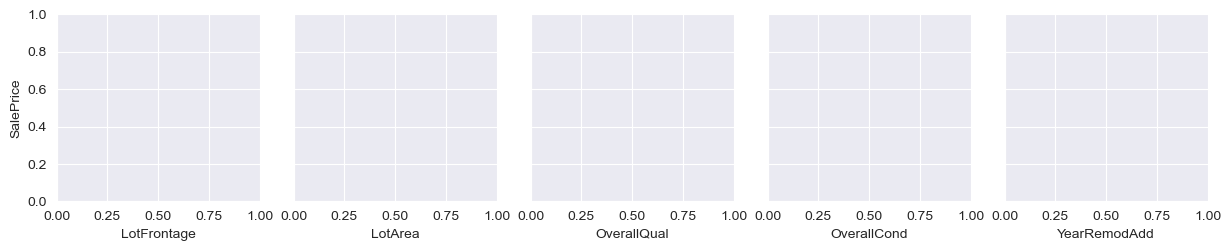

In [14]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

In [52]:
data = data[data["LotFrontage"] < 200]
data = data[data["LotArea"] < 100000]
data = data[data["TotalBsmtSF"] < 4000]
data = data[data["GrLivArea"] < 4000]


In [53]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,SalePrice,bathrooms
count,1195.000000,1195.000000,1195.000000,1195.00000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
mean,57.251046,69.422594,9680.297908,6.10795,5.562343,1985.133054,589.900418,1050.637657,1499.292887,2.860251,1.051883,6.517992,470.661925,179618.072803,2.390795
std,43.187437,21.848220,4913.315610,1.40443,1.095944,21.207909,449.092611,415.534313,494.946196,0.810144,0.232932,1.612442,219.230208,80059.502132,0.915390
min,20.000000,21.000000,1300.000000,1.00000,2.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,0.000000,2.000000,0.000000,34900.000000,1.000000
25%,20.000000,59.000000,7411.000000,5.00000,5.000000,1965.500000,245.500000,784.000000,1131.500000,2.000000,1.000000,5.000000,308.000000,127500.000000,2.000000
50%,50.000000,69.000000,9246.000000,6.00000,5.000000,1995.000000,506.000000,988.000000,1456.000000,3.000000,1.000000,6.000000,478.000000,159000.000000,2.000000
75%,70.000000,80.000000,11217.000000,7.00000,6.000000,2004.000000,832.500000,1304.000000,1765.000000,3.000000,1.000000,7.000000,577.000000,213125.000000,3.000000
max,190.000000,182.000000,70761.000000,10.00000,9.000000,2010.000000,2336.000000,3206.000000,3627.000000,8.000000,3.000000,14.000000,1390.000000,625000.000000,6.000000


In [ ]:
for d in df_num.columns:
    print(d)

In [ ]:
for d in df_num.columns:
    print(data[d])
    max_value = data[d].max()
    min_value = data[d].min()
    new_value = (data[d]-min_value)/(max_value-min_value)
    data[d] = new_value

In [ ]:
data.describe()

In [ ]:
"""
Remove outliers
Deal with categorical data
"""
df_cat = data.select_dtypes(include = ['object'])
df_cat['MSSubClass'] = data['MSSubClass']

categorical_col = df_cat.columns
for col in categorical_col:
    data[col] = data[col].astype("categorical")
